In [1]:
import pandas as pd
import numpy as np
from invertiblewavelets import Transform, LinearFilterBank, DyadicFilterBank
import matplotlib.pyplot as plt
from invertiblewavelets import Morlet, Cauchy
import time
from scipy import signal
from magprime import utility

c:\Users\aphoffm2\AppData\Local\anaconda3\envs\mag\Lib\site-packages\pymssa\mssa.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Load Example Data from Michibiki-1 Spacecraft Magnetoemter

In [2]:
B = utility.load_michibiki_data()[:,2]
sample_rate = 1
B = B[:, ::10]

#### Create Transform Object and Analysis Filters

In [8]:
fb = DyadicFilterBank(wavelet=Morlet(1,10) , fs=sample_rate, N=10000, real=False, dj = 1/12, s_max=10, compensation=True)
transform = Transform(
    filterbank=fb,
)

Time taken for WAICUP:  0.42093372344970703


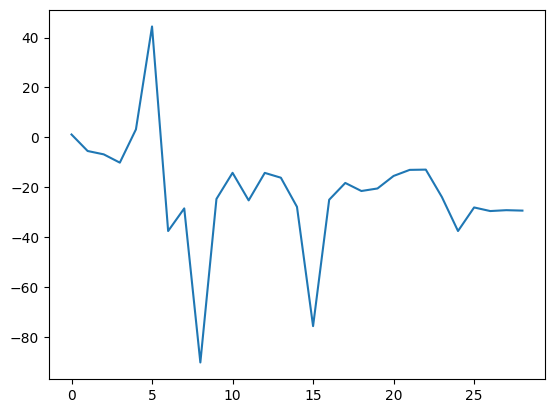

In [9]:
#### WAICUP
start = time.time()

w1 = transform.forward(B[0], mode='full')
w2 = transform.forward(B[1], mode='full')

D = w2 - w1  # shape (J, T), complex


# 1) correlations (eqs 6–7), using conjugate inner products
C1 = np.sum( D * np.conj(w1), axis=1 )   # shape (J,)
C2 = np.sum( D * np.conj(w2), axis=1 )   # shape (J,)

# 2) gain estimate K̂ per scale (eq 8)
K_hat = C2/C1                   # shape (J,)

# (optionally force to real if you know K is real:)

plt.plot(K_hat, label='K_hat')

# 3) residuals (eq 9)
A1 = (w1-w2) / (K_hat[:,None]-1 )  # shape (J, T), complex

# 4) ambient‑field estimate X(s,τ) (eq 10)
X1 = (K_hat[:,None]*w1 - w2) / (K_hat[:,None] - 1) 

result = transform.inverse(X1, mode='full', Lx=8640)
interference = transform.inverse(A1, mode='full', Lx=8640)
end = time.time()
print("Time taken for WAICUP: ", end - start)

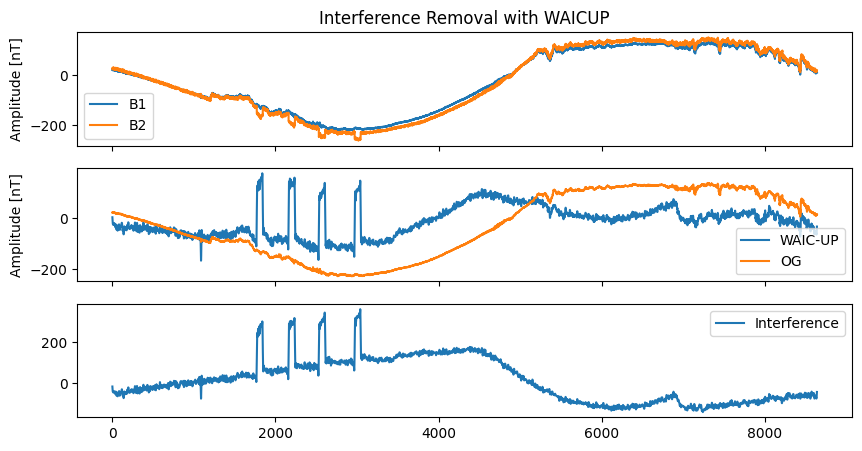

In [10]:
from magprime.algorithms import WAICUP
%matplotlib inline
fig, ax = plt.subplots(3,1, sharex=True, figsize=(10, 5))


ax[0].plot(B[0], label='B1')
ax[0].plot(B[1], label='B2')
ax[0].legend()
ax[1].plot(result, label='WAIC-UP')
ax[1].plot(WAICUP.clean(B, triaxial=False), label='OG')
ax[2].plot(interference, label='Interference')
ax[1].legend()
ax[2].legend()
ax[0].set_title('Interference Removal with WAICUP')
ax[0].set_ylabel('Amplitude [nT]')

ax[1].set_ylabel('Amplitude [nT]')
ax[0].legend()
ax[1].legend()
plt.show()

In [7]:
fro

NameError: name 'fro' is not defined